In [51]:
import re
import sys

# -------
#   7293   0x1c7d c7-3c2s15n1  compute        up interactive
in_xt = '/home/piccinal/linux.git/slurm/crayvis/matplotlib/xtprocadmin.daint'
file_in_xt = open(in_xt, "r")

dict_cabinet_of_nid = {}
dict_row_of_nid = {}
for line in file_in_xt.readlines()[1:]:
    nidn = line.split()[0]
    nidn = int(nidn)

    cabinet_i = line.split()[2].split('-')[0][1:]
    dict_cabinet_of_nid[nidn] = int(cabinet_i)

    row_j = line.split()[2].split('-')[1].split('c')[0]
    dict_row_of_nid[nidn] = int(row_j)

print('Found', len(dict_cabinet_of_nid), 'compute nodes')    
print('nid7293: cabinet=', dict_cabinet_of_nid[7293], 'row=',dict_row_of_nid[7293])

#quit(0)

Found 7246 compute nodes
nid7293: cabinet= 7 row= 3


In [40]:
# -------
# hostlist -e `sacct -j 1323038 -o nodelist -P |grep -m1 ^nid` > nids.daint
# nid02302
# nid02596
in_nids = '/home/piccinal/linux.git/slurm/crayvis/matplotlib/nids.daint'
file_in_nids = open(in_nids, "r")

for nnn in file_in_nids:
    nidtmp = nnn.split('nid')[1]
    nidtmp = int(nidtmp)
    print(nidtmp, dict_cabinet_of_nid[nidtmp], dict_row_of_nid[nidtmp])

2302 1 1
2670 3 1
3025 5 1
3027 5 1
7293 7 3


2302 1 1
2670 3 1
3025 5 1
3027 5 1
7293 7 3
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0. 10.  0. 20.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]]


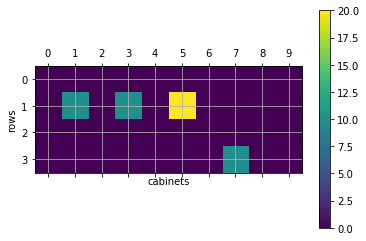

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#def samplemat(dims):
#    """Make a matrix with all zeros and increasing elements on the diagonal"""
#    aa = np.zeros(dims)   # numpy.ndarray
#    for i in range(min(dims)):
#        aa[i, i] = 10
#    return aa

in_nids = '/home/piccinal/linux.git/slurm/crayvis/matplotlib/nids.daint'
file_in_nids = open(in_nids, "r")

ndarray_daint_gpu = np.zeros( (4,10) ) # 0:9cabinets * 0:3rows
for nnn in file_in_nids:
    nidtmp = nnn.split('nid')[1]
    nidtmp = int(nidtmp)
    print(nidtmp, dict_cabinet_of_nid[nidtmp], dict_row_of_nid[nidtmp])
    ndarray_daint_gpu[dict_row_of_nid[nidtmp], dict_cabinet_of_nid[nidtmp] ] += 10
    
print(ndarray_daint_gpu)

# Display matrix
plt.close(1)
#plt.matshow(samplemat((4, 10)))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ndarray_daint_gpu) # ,interpolation='nearest')
fig.colorbar(cax)
#ax.set_title('Piz Daint')
ax.set_xlabel('cabinets')
ax.set_ylabel('rows')
#fig.colorbar(111)
#fig.matshow(ndarray_daint_gpu)
plt.grid(True)

ax.xaxis.set_major_locator(ticker.FixedLocator([0,1,2,3,4,5,6,7,8,9]))

#alpha = ['ABC', 'DEF', 'GHI', 'JKL']
#ax.set_xticklabels(['']+alpha)
#ax.set_yticklabels(['']+alpha)
plt.show()


#data = np.random.random((4,4))
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(data, interpolation='nearest')
#fig.colorbar(cax)
#plt.show()